# Mašinska obrada tekstualnih podataka

>U ovoj svesci su dati primeri obrade tekstualnih podatka u Pajtonu. Sa karakterima i stringovima ne mogu da se izvode računske operacije, ali razne operacije poput pronalaženja, spajanja i razdvajanja mogu. Slično kao i kod numeričkih podataka, na kraju obrade tekstualnih podataka radimo statistiku i otvaramo mogućnosti za analizu i tumačenje podataka.

Tekstualni podaci se najbolje obrađuju tako što ih neko pročita sa razumevanjem. Naravno, to ljudi još uvek bolje rade nego mašine. Ipak, ima mnogo situacija kada taj posao moramo da prepustimo mašini. Na primer, kada imamo deset sekundi da obradimo tekst ili kada treba obraditi hiljadu fajlova. Pomoć mašine je tada više nego dobrodošla.

Mašine mogu da "čitaju" tekst na dva načina: da rade po instrukcijama ili da im objasnimo šta je cilj pa da same uče. Ovo drugo je već u domenu mašinskog učenja i time se nećemo baviti u ovoj lekciji. Umesto toga bavićemo se jednostavnijim algoritmima čije je ishode lakše protumačiti. 

Tekstualni podaci sa kojima se najčešće susrećemo u javnoj upravi su oni koji nisu strukturirani i smešteni u baze podataka ili tabele. Uglavnom su to dokumenti, tekstualni zapisi u nekoliko različitih formata koje čuvamo na raznim mestima. Za tako organizovane podatke jednostavnih alata za obradu i analizu nema. Moramo da uložimo trud da tekstovi budu u formatu koji je mašinski čitljiv.

### Tekstualni podaci u tabeli
Tekstualni podaci prikazani u tabeli se lakše obrađuju i analiziraju nego čist tekst jer je neko već razvrstao delove teksta i pridružio ih atributima koji su opisani nazivima kolona. Ovo je struktura kakvu priželjkujemo kada radimo sa tekstom. 

Za ovu vežbu ćemo koristiti tabelu koja nam je već poznata -- "Opštinski pokazatelji poslednje stanje". Učitajte je sa Portala otvorenih podataka. Ako se desi da Portal ne radi, učitajte isti taj fajl koji je na vreme preuzet.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#df=pd.read_csv("http://opendata.stat.gov.rs/data/WcfJsonRestService.Service1.svc/dataset/03IND01/1/csv",sep=";")
df=pd.read_csv("data/03IND01.csv",sep=";")

Šta sve postoji od atributa to možemo da vidimo u zaglavlju pomoću funkcije `head()`. Sada ćemo izabrati pogodan tekstualni podatak za analizu. Ime predsednika opštine izgleda kao zgodan podatak za obradu. Problem je samo što se vrednosti u koloni __vrednost__ ne odnose uvek na ime predsednika opštine. Ima tu i drugih indikatora.

In [3]:
df.head()

,IDIndikator,Indikator,mes,god,idter,nter,vrednost,CreateDate,LastUpdate,IDLegenda,nIzvorI
0,IND00M01,Градоначелник/председник општине,1,2021,70017,Александровац,МИРКО МИХАЈЛОВИЋ,1/4/2021 7:39:27 AM,1/4/2021 7:39:27 AM,A,Републички завод за статистику (РЗС)
1,IND01G01,Површина (у км²),0,2020,70017,Александровац,387,1/27/2021 10:15:39 AM,1/27/2021 10:22:18 AM,A,Републички геодетски завод (РГЗ)
2,IND01G02,Број становника - процена (последњи расположив...,0,2019,70017,Александровац,23898,7/1/2020 1:01:17 PM,7/1/2020 1:01:17 PM,A,Републички завод за статистику (РЗС)
3,IND01G03,Густина насељености (број становника / км2),0,2019,70017,Александровац,62,7/1/2020 1:01:17 PM,7/1/2020 1:01:17 PM,A,Републички завод за статистику (РЗС)
4,IND01G04,Број насеља,0,2020,70017,Александровац,55,1/27/2021 10:15:39 AM,1/27/2021 10:22:18 AM,A,Републички завод за статистику (РЗС)


In [4]:
imeiprezime=df[df['Indikator']=='Градоначелник/председник општине']['vrednost']

Da proverimo brzo šta se nalazi u nizu __imeiprezime__.

In [5]:
imeiprezime[0]

'МИРКО МИХАЈЛОВИЋ'

Ovo je pravi trenutak da se dogovorimo šta hoćemo da uradimo. Posle ćemo videti kako. Niz od 175 imena i prezimena predsednika opštine sam za sebe ne govori mnogo, ali bi mogao da nam govori na primer o rodnoj zastupljenosti. Ako bismo string __imeiprezime__ podelili na ime i prezime, mogli bismo da napravimo statistiku po imenima.

Ako isečemo string __imeiprezime__ tamo gde su razmaci i uzmemo prvi deo tog isečenog stringa, dobićemo samo ime. Funkcija `split()` seče string na delove. Ako ne navedemo ni jedan argument, separator će biti razmak. "Sečenje" stringa na upotrebljive delove se, inače, stručno zove __parsiranje__.

In [6]:
# pošto Pajton nizove indeksira počevši od nule, indeks 0 se odnosi na prvi element
imeiprezime[0].split()[0]

'МИРКО'

Sada ćemo sva imena staviti u novu listu koju ćemo nazvati __imena_lista__. U njoj će biti samo imena bez prezimena. Obratite pažnju da ima opština za koje nije navedeno kako se zove predsednik opštine pa tu stoji razmak " ". Ovakva imena treba preskočiti. Napisaćemo program koji prolazi kroz sva imena u listi, proverava da li su različita od " " i pravi novu listu bez nedostajućih imena. Petlja u programu za svaki element __iip__ koji se nalazi u listi __imeiprezime__ proverava da li je jednak " ". Ako nije, string delimo na manje stringove odvojene razmakom `iip.split()`, uzimamo samo prvi deo u kom se nalazi ime i tim elementom dopunjujemo novu listu __imena_lista__ pomoću funkcije `append()`. Uslov `iip!=" "` znači da element __iip__ nije jednak " ". (Zapamtite da kod logičkih iskaza znak `!=` znači nije jednako, dok je `==` jednako.)

In [7]:
imena_lista=[]
for iip in imeiprezime:
    if iip!=" ":
        imena_lista.append(iip.split()[0])

Napomena: Dopunjavanje liste kroz petlju je logičan način za sve one koji programiraju. Pajton, međutim, ima kraću i efikasniju varijantu pisanja istog koda. Sintaksu nije teško prepoznati.

```
imena_lista=[iip.split()[0] for iip in imeiprezime if iip!=" "]
```

In [8]:
imena_lista

['МИРКО',
 'ДАЛИБОР',
 'БОЈАН',
 'ПРЕДРАГ',
 'ИВАНА',
 'ВЕСНА',
 'ЗДРАВКО',
 'ГОРАН',
 'СЛОБОДАН',
 'ИВАНА',
 'МИЛАН',
 'ДРАГАН',
 'ВЛАДАН',
 'ГАВРИЛО',
 'БОЈАН',
 'ВЛАДАН',
 'АЛЕКСАНДАР',
 'МИРОСЛАВ',
 'АЛЕКСАНДАР',
 'МИЛОШ',
 'ИРЕНА',
 'ЖИВОРАД',
 'РАДОСЛАВ',
 'СРЂАН',
 'ИВАН',
 'НЕНАД',
 'НЕБОЈША',
 'НЕБОЈША',
 'АЛЕКСАНДАР',
 'ВЛАДИМИР',
 'САША',
 'НАГИП',
 'ЛАЗАР',
 'ВОЈКАН',
 'ИГОР',
 'ДРАГАН',
 'ГОРАН',
 'ГОРАН',
 'ЗОРАН',
 'БОБАН',
 'МИЛИСАВ',
 'НЕБОЈША',
 'ДЕЈАН',
 'НИКОЛА',
 'ВЛАДИЦА',
 'ГОРАН',
 'ЈОВАН',
 'САФЕТ',
 'ИВАН',
 'ВЕЛИМИР',
 'МОМЧИЛО',
 'САША',
 'СРЕЋКО',
 'МИЛАН',
 'СНЕЖАНА',
 'ДУШАН',
 'НИКОЛА',
 'ПРЕДРАГ',
 'ИВАН',
 'ДРАГИ',
 'РАДОЉУБ',
 'ИВАН',
 'АНДРИЈА',
 'ИВАН',
 'ГОРАН',
 'ВИДОЈЕ',
 'МИЛИВОЈЕ',
 'ДРАГАН',
 'МИЛАН',
 'ДРАГАН',
 'ЗОРАН',
 'МАЛИША',
 'НЕБОЈША',
 'САША',
 'БОБАН',
 'ВЛАДИМИР',
 'РАДОСАВ',
 'НИХАТ',
 'НИКОЛА',
 'ВЛАДИМИР',
 'ДУШКО',
 'ВЛАДАН',
 'ЂОРЂЕ',
 'ШЋИПРИМ',
 'ЛАЗАР',
 'ВЛАДИМИР',
 'МИЛАН',
 'ДОБРИЦА',
 'НЕНАД',
 'ИГЊАТ',
 'АЛЕКСАНДАР',
 

Biblioteka __pandas__ ima promenljivu tipa serija koja je složenija varijanta liste. Za taj tip promenljive su napisane brojne funkcije koje ne postoje za liste. Zato je zgodno da promenljiva __imena_lista__ umesto liste postane serija. U tom slučaju će nam odmah biti dostupne razne statističke funkcije. Listu ćemo u seriju pretvoriti pomoću funkcije `Series()` i odmah prebrojati koliko ima kojih imena.

In [9]:
# od liste pravimo seriju kako bismo lakše mogli da prebrojimo imena
imena_serija=pd.Series(imena_lista)
imena_serija.value_counts()

ДРАГАН        7
НЕБОЈША       6
ВЛАДИМИР      6
ГОРАН         6
АЛЕКСАНДАР    6
             ..
НИХАТ         1
МИЛЕНА        1
ВЛАДИЦА       1
СНЕЖАНА       1
ЖИВОРАД       1
Length: 95, dtype: int64

Izgleda da je sa serijom sve u redu. Vidimo da ima 95 različitih imena. Sada ćemo grafički da prikažemo koja se imena koliko puta pominju u seriji. Zbog preglednosti prikazujemo samo prvih 16 najčešćih, ali to lako možete da promenite. Sa serijama se lako radi crtanje grafika. U ovom slučaju u seriju __y__ stavljamo imena sortirana po broju pojavljivanja. Dovoljno je da napišemo `y.plot()` i grafik će se prikazati. Doduše, izbor tipa grafika neće biti baš najbolji. Zbog toga treba specifikovati da hoćemo horizontalni stubični dijagram, tj. _horizontal bar chart_ - `kind='barh'`. Da bismo promenili redosled najčešćih imena tako da ide odozgo na dole, invertovaćemo y-osu pomoću `gca().invert_yaxis()`.

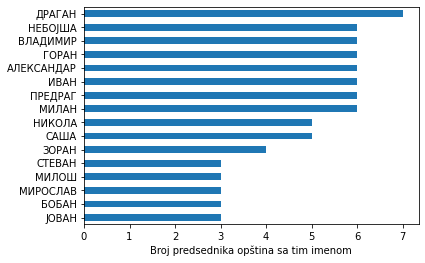

In [10]:
y=imena_serija.value_counts()[:16]
y.plot(kind='barh')
plt.xlabel('Broj predsednika opština sa tim imenom')
plt.gca().invert_yaxis()

Ovo je jednostavan i pregledan način da uporedimo rezultate. Odmah vidimo da je najčešće neki Dragan predsednik opštine, pa Vladimir, pa Milan itd. Primećujete li nešto neobično kod ovih imena? Sva su muška. Ima li uopšte predsednica opština u Srbiji. Koliko?

Pošto u seriji nemamo podatak o polu predsednika opština već samo ime, trebalo bi da na osnovu imena procenimo kog su pola. Računar ne zna koje je ime muško, a koje žensko. Napravićemo procenu na osnovu __heuristike__ (jednostavnog pravila koje uglavnom daje tačnu procenu). Jedna takva heuristika može da bude da se ženska imena skoro uvek završavaju na A.

Kod svake reči ćemo uzeti poslednje slovo i proveriti da li je A. Pojedinačne karaktere iz teksta u Pajtonu možemo da izdvajamo uz pomoć indeksa u uglastoj zagradi. Tako će nam __ime[0]__ dati prvo slovo, dok će nam __ime[-1]__ dati poslednje. U niz __pol__ ćemo staviti 0 za imena koja se ne završavaju na A i 1 za ona koja se završavaju tim slovom. 

```{admonition} Važna napomena!
Kada proveravate koje je koje slovo obavezno obratite pažnju na pismo. "A" i "A" nisu isti karakter ako je jednom slovo pisano latinicom, a drugi put ćirilicom.
```

In [11]:
pol=[]
for ime in imena_lista:
    if ime[-1]=="А":
        pol.append(1)
    else:
        pol.append(0)

Pošto u seriji imamo samo nule i jedinice, srednja vrednost niza će nam reći koliki je udeo jedinica (odnosno imena koja se završavaju na A) u celom nizu.

In [12]:
# udeo jedinica u nizu
np.mean(pol)

0.2411764705882353

Čini se da imamo 25% predsednika opština čija se imena završavaju na A. Da li su svi žene? Verovatno ne. Hajde da prvo napravimo _DataFrame_ sa dve kolone: jedan sa imenom, druga sa kôdom koji odgovara procenjenom polu.

Ovde ćemo _DataFrame_ napravimo pomoću strukture rečnik (eng. _dictionary_). Nećemo se na tome mnogo zadržavati. Probajte da varirate sadržaj u sledećoj ćeliji da vidite kako to funkcioniše. U svakom slučaju, ovde smo određenim oznakama (__Ime__ i __Pol__), pridružili nizove __imena_lista__ i __pol__. Pomoću funkcije `DataFrame()` Pajton će sadržaj rečnika __data__ spakovati u _DataFrame_ gde su oznake nazivi kolona, a nizovi sadržaj tih kolona. 

In [13]:
data={'Ime':imena_lista,'Pol':pol}
ime_df=pd.DataFrame(data)

In [14]:
ime_df

,Ime,Pol
0,МИРКО,0
1,ДАЛИБОР,0
2,БОЈАН,0
3,ПРЕДРАГ,0
4,ИВАНА,1
...,...,...
165,ДРАГАН,0
166,ПРЕДРАГ,0
167,СТАНА,1
168,ЗОРАН,0


Sada da vidimo sva imena kojima je dodeljen kôd 1.

In [15]:
ime_df[ime_df['Pol']==1]['Ime'].unique()

array(['ИВАНА', 'ВЕСНА', 'ИРЕНА', 'НЕБОЈША', 'САША', 'НИКОЛА', 'ВЛАДИЦА',
       'СНЕЖАНА', 'АНДРИЈА', 'МАЛИША', 'ДОБРИЦА', 'АЛЕКСАНДРА', 'МИЉАНА',
       'МИЛЕНА', 'ЈОВИЦА', 'НАТАША', 'ДРАГАНА', 'ЈЕЛЕНА', 'ДУБРАВКА',
       'СТЕВА', 'ЈАСНА', 'МИРЈАНА', 'САЊА', 'СИНИША', 'СВЕТЛАНА', 'СТАНА'],
      dtype=object)

Vidimo da jednostavna heuristika, odnosno algoritam koji smo od nje napravili imena kao što su Nebojša, Saša, Nikola itd. takođe razvrstava kao ženska. Srećom nema ih previše pa možemo da ih stavimo u niz izuzetaka i tako promenimo kôd. Istina ni mi ne znamo pouzdano kog su pola Sanja, Saša ili Vladica, ali to neće mnogo uticati na konačni rezultat. Nas interesuje procena.

U `for` petlji po svim imenima iz spiska izuzetaka odgovarajućim imenima ćemo dodeljivati kôd 0.  

In [16]:
for ime in ['НЕБОЈША','САША','НИКОЛА','МАЛИША','СИНИША','ЈОВИЦА','СТЕВА','АНДРИЈА','ДОБРИЦА']:
    ime_df.loc[ime_df['Ime']==ime,'Pol']=0

Da vidimo sad koliko ima jedinica u nizu, odnosno predsednica među predsednicima.

In [17]:
np.mean(ime_df['Pol'])

0.11176470588235295

Ima ih, izgleda, 11%. Grafički to možemo jednostavno da prikažemo ovako:

<BarContainer object of 2 artists>

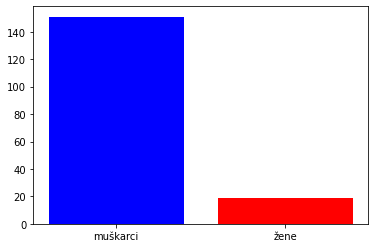

In [18]:
plt.bar(['muškarci','žene'],ime_df['Pol'].value_counts(),color=['blue','red'])

Ovde smo prebrojali koliko ima kojih vrednosti u `ime_df['Pol']` pomoću funkcije `value_counts()`. Pošto imamo samo dve različite vrednosti (0 i 1, odnosno muško i žensko), pridružili smo im oznake __muškarci__ i __žene__ i boje plavo i crveno. Sa tim argumentima smo pokrenuli funkciju za crtanje stubičnih dijagrama (eng. _bar charts_).

### Pretraga teksta

Tekst nije uvek složen u tabele, niti u liste gde je svaki element string u kom prvo ide ime, pa razmak pa prezime. Tekstovi nemaju unapred poznatu strukturu. Zato je često neophodno da u tekstu tražimo string.

Pretraga teksta može da bude proizvoljno komplikovana. Za to postoje posebne biblioteke kojima se ovde nećemo baviti. Za dosta toga dovoljne su funkcije za rad sa stringovima koje Pajton već ima. Navešćemo samo nekoliko korisnih funkcija.

Funkcija `count()` probrojava stingove u tekstu. Taj string može da bude npr. razmak " ". Ako prebrojimo razmake znaćemo koliko ima reči u tekstu. 

In [19]:
tekst='Pretraga teksta može da bude proizvoljno komplikovana. Za to postoje posebne biblioteke kojima se ovde nećemo baviti. Za dosta toga dovoljne su funkcije za rad sa stringovima koje Pajton već ima. Navešćemo samo nekoliko korisnih funkcija'
tekst.count(" ")

35

Pomoću funkcije `split()` možemo da podelimo tekst na listu stringova koje odvaja argument te funkcije. Videli smo kako to radi kad smo razdvajali ime i prezime. Slično možemo i da podelimo tekst na rečenice.

In [20]:
tekst.split(". ")

['Pretraga teksta može da bude proizvoljno komplikovana',
 'Za to postoje posebne biblioteke kojima se ovde nećemo baviti',
 'Za dosta toga dovoljne su funkcije za rad sa stringovima koje Pajton već ima',
 'Navešćemo samo nekoliko korisnih funkcija']

Pomoću funkcije `find()` možemo da nađemo gde se nalazi odgovarajući string. Rezultat će biti indeks, odnosno redni broj karaktera u tekstu gde počinje taj string minus jedan.

In [21]:
tekst.find("biblioteke")

77

Pomoću funkcija `upper()` i `lower()` možemo da pretvaramo slova u velika i mala. To može da bude zgodno kod ekstrakcije ključnih reči gde nam nije bitno kakvim je slovima zapisan termin. Zamenu teksta nekim drugim možemo da uradimo pomoću funkcije `replace()`. Evo primera:

In [22]:
tekst.replace("proizvoljno", "proizvoljno".upper())

'Pretraga teksta može da bude PROIZVOLJNO komplikovana. Za to postoje posebne biblioteke kojima se ovde nećemo baviti. Za dosta toga dovoljne su funkcije za rad sa stringovima koje Pajton već ima. Navešćemo samo nekoliko korisnih funkcija'

Pošto je igra sa stringovima zaista proizvoljno komplikovana, dalje ispitivanje ovih funkcija prepuštamo vašem samostalnom radu. Umesto toga, prelazimo na statistiku stringova. 

### Statistika tokena

Analiza teksta se zasniva na statistici tokena (znakova) u tom tekstu. Taj token može da bude slovo, slog, reč, sintagma itd. Svaki tekst u digitalnom obliku možemo da podelimo na tokene i da ih onda statistički obrađujemo. Ukoliko tekst nije čist (eng. _plain text_) nego ima i kontrolne znakove, to neće biti sasvim jednostavno. Vrlo često je neophodno da tekst čistimo nekoliko puta kako bi bio adekvatan za analizu. Da pogledamo sada kako bi izgledala jednostavna analiza ovog pasusa.

Jednostavna mašinska analiza teksta podrazumeva čišćenje teksta (uklanjanje znakova interpunkcije, uklanjanje reči koje prave šum, konverzija svih slova u mala, itd.) i "tokenizaciju" očišćenog teksta, tj. razdvajanje teksta na pojedinačne tokene. Iako bi bilo dobro prvo da očistimo tekst pa da ga tokenizujemo, to nije uvek jednostavno.

Probaćemo kako izgleda analiza na prvom pasusu ovog teksta. Namerno ćemo ovog puta prvo uraditi tokenizaciju pa tek onda čišćenje teksta.

In [23]:
pasus="Аnaliza teksta se zasniva na statistici tokena (znakova) u tom tekstu. Taj token može da bude slovo, slog, reč, sintagma itd. Svaki tekst u digitalnom obliku možemo da podelimo na tokene i da ih onda statistički obrađujemo. Ukoliko tekst nije čist (plain text) nego ima i kontrolne znakove, to neće biti sasvim jednostavno. Vrlo često je neophodno da tekst čistimo nekoliko puta kako bi bio adekvatan za analizu. Da pogledamo sada kako bi izgledala jednostavna analiza ovog pasusa."

U najjednostavnijem slučaju, tokeni su pojedinačni karakteri u tekstu. To ćemo prvo da probamo. Napravićemo listu tokena (u ovom slučaju znakova) koji se nalaze u tom pasusu. Otvorićemo na početku praznu listu __pasus_lista__ i potom dodavati znak po znak u listu dok ne dođemo do kraja pasusa. 

In [24]:
pasus_lista=[pasus[slovo] for slovo in range(0,len(pasus))]

In [25]:
print(pasus_lista)

['А', 'n', 'a', 'l', 'i', 'z', 'a', ' ', 't', 'e', 'k', 's', 't', 'a', ' ', 's', 'e', ' ', 'z', 'a', 's', 'n', 'i', 'v', 'a', ' ', 'n', 'a', ' ', 's', 't', 'a', 't', 'i', 's', 't', 'i', 'c', 'i', ' ', 't', 'o', 'k', 'e', 'n', 'a', ' ', '(', 'z', 'n', 'a', 'k', 'o', 'v', 'a', ')', ' ', 'u', ' ', 't', 'o', 'm', ' ', 't', 'e', 'k', 's', 't', 'u', '.', ' ', 'T', 'a', 'j', ' ', 't', 'o', 'k', 'e', 'n', ' ', 'm', 'o', 'ž', 'e', ' ', 'd', 'a', ' ', 'b', 'u', 'd', 'e', ' ', 's', 'l', 'o', 'v', 'o', ',', ' ', 's', 'l', 'o', 'g', ',', ' ', 'r', 'e', 'č', ',', ' ', 's', 'i', 'n', 't', 'a', 'g', 'm', 'a', ' ', 'i', 't', 'd', '.', ' ', 'S', 'v', 'a', 'k', 'i', ' ', 't', 'e', 'k', 's', 't', ' ', 'u', ' ', 'd', 'i', 'g', 'i', 't', 'a', 'l', 'n', 'o', 'm', ' ', 'o', 'b', 'l', 'i', 'k', 'u', ' ', 'm', 'o', 'ž', 'e', 'm', 'o', ' ', 'd', 'a', ' ', 'p', 'o', 'd', 'e', 'l', 'i', 'm', 'o', ' ', 'n', 'a', ' ', 't', 'o', 'k', 'e', 'n', 'e', ' ', 'i', ' ', 'd', 'a', ' ', 'i', 'h', ' ', 'o', 'n', 'd', 'a', ' ',

Statistiku ove liste ćemo lakše uraditi ako je prebacimo u promenljivu tipa serija koju imamo u Pandas biblioteci. Za podatke tog tipa imamo nekoliko statističkih funkcija. Jedna od njih je `describe()` koja nam daje osnovnu deskriptivnu statistiku: koliko serija ima elemenata (__count__), koliko ih ima jedinstvenih (__unique__), koji se najčešće pojavljuju (__top__) i koliko puta (__freq__). 

In [26]:
pasus_serija=pd.Series(pasus_lista)

In [27]:
pasus_serija.describe()

count     481
unique     37
top          
freq       77
dtype: object

U tekstu koji smo obradili ima 481 znak, od čega 37 jedinstvenih. Iako izgleda da nema znaka koji se najčešće ponavlja, ima ga -- to je razmak. Ponavlja se 77 puta. Konačno, __pasus_serija__ spada u objekte.  

Ova statistika nam ne govori mnogo o tekstu. Zato bi bilo bolje da pogledamo statistiku svih znakova, odnosno da ih prebrojimo. Funkcija `value_counts()` radi upravo to. Pri tome ova funkcija sortira elemente počevši od najfrekventnijeg.

In [28]:
pasus_serija.value_counts()

     77
a    50
o    43
t    35
i    35
e    32
n    28
s    24
k    23
d    16
l    16
m    12
v    10
u     9
z     8
b     7
g     7
p     6
j     6
.     6
č     5
r     4
,     4
)     2
(     2
h     2
ž     2
S     1
T     1
А     1
đ     1
V     1
U     1
D     1
ć     1
c     1
x     1
dtype: int64

Najčešće se pojavljuje " " (77 puta), pa "a" (50), pa "o" (43) itd. Ako prođete kroz celu listu videćete da se posebno pojavljuju velika i mala slova, kao i da tu ima i znakova interpunkcije. Za frekvencijsku analizu slova nije mnogo važno koliko se puta pojavljuju zagrade i da li je slovo na početku rečenice. Pojednostavljenu analizu možemo da uradimo tako što ćemo napisati našu funkciju `ciscenje()` koja prvo sva slova pretvori u mala uz pomoć funkcije `lower()`, zameni sve znake interpunkcije ",.()\_" razmacima pomoću funkcije `replace()` i konačno izbriše višak razmaka tamo gde ih ima pomoću funkcije `strip()`.

Uklanjanje znakova koji nisu slova može efikasnije da se uradi pomoću regularnih izraza (eng. _regular expressions_), ali ćemo to ostaviti za napredni kurs.

In [29]:
def ciscenje(text):
    text=text.lower()
    text=text.replace(',', ' ')
    text=text.replace('.', ' ')
    text=text.replace('(', ' ')
    text=text.replace(')', ' ')
    text=text.replace('_', ' ')
    text=text.strip()
    return text

In [30]:
ciscenje(pasus)

'аnaliza teksta se zasniva na statistici tokena  znakova  u tom tekstu  taj token može da bude slovo  slog  reč  sintagma itd  svaki tekst u digitalnom obliku možemo da podelimo na tokene i da ih onda statistički obrađujemo  ukoliko tekst nije čist  plain text  nego ima i kontrolne znakove  to neće biti sasvim jednostavno  vrlo često je neophodno da tekst čistimo nekoliko puta kako bi bio adekvatan za analizu  da pogledamo sada kako bi izgledala jednostavna analiza ovog pasusa'

Primetite kako smo sve korake čišćenja teksta stavili u jednu funkciju i tako automatizovali ovaj proces. To je suština skriptne obrade podataka. Kad konačno napišemo kôd, onda sve možemo da izvršimo u jednom koraku.

Sad možemo da ponovimo tokenizaciju, odnosno pravljenje liste tokena sa ovako pojednostavljenim tekstom i da onda izračunamo frekvencije.

In [31]:
pasus=ciscenje(pasus)
pasus_lista=[]
for znak in range(0, len(pasus)):
    pasus_lista.append(pasus[znak])
pasus_serija=pd.Series(pasus_lista)
pasus_serija.value_counts()

     90
a    50
o    43
t    36
i    35
e    32
n    28
s    25
k    23
d    17
l    16
m    12
v    11
u    10
z     8
b     7
g     7
j     6
p     6
č     5
r     4
h     2
ž     2
а     1
c     1
ć     1
đ     1
x     1
dtype: int64

Čemu bi sad ovo moglo da posluži? Na primer za prepoznavanje jezika na kom je pisan tekst. Frekvencija slova se značajno razlikuje među jezicima pa čak i među dijalektima. Nesumnjivo je da će frekvencija slova j biti veća u jekavici nego u ekavici. Čak i kratke sekvence slova mogu da ukažu na jezik kojim je tekst pisan i za to ne moramo da znamo jezik. Mašinama je dovoljno da nizove frekvenci u nekoj rečenici uporede sa tipičnim frekvencama u određenim jezicima i tako odrede koji je jezik u pitanju. U engleskom je, na primer, najfrekventnije slovo e, dok je u srpskom a. Jasno, ukoliko postoje specifična slova kao što su ć, я ili Ψ identifikacija će biti trivijalna. Mašine su nam potrebne za ono što nije očigledno.

#### _n_-gram

Jasno, frekvencije slova ne mogu mnogo da nam kažu o sadržaju teksta. Bolje je da probamo sa statistikom reči. Osnovni koncept u rudarenju teksta je _n_-gram, tj. sekvenca od _n_ tokena (najčešće znakova ili reči) u nekom većem tekstu. Ako za token uzmemo reč, 1-grami su u ovom tekstu "Osnovni", "koncept", "u" itd., dok su 2-grami "Osnovni koncept", "koncept u" itd.

Da bismo videli moć statističke analize tokena, uzećemo jedan (vama) nepoznati tekst i analizirati ga. Taj tekst je malo veći i nalazi se u fajlu __"CELEX 32016R0679 EN TXT.txt"__. Nećemo ga učitavati u DataFrame kao što smo to radili sa tabelama. Dovoljno je da ga učitamo u promenljivu tipa string.

In [32]:
text=open('data/CELEX 32016R0679 EN TXT.txt').read()

In [33]:
type(text)

str

Da vidimo prvo šta se nalazi na početku ovog teksta.

In [34]:
text[:300]

'Top <#d1e40-1-1>\n\n  * Top <#d1e40-1-1>\n  * CHAPTER I - General provisions <#d1e1374-1-1>\n      o Article 1- Subject-matter and objectives <#d1e1384-1-1>\n      o Article 2- Material scope <#d1e1404-1-1>\n      o Article 3- Territorial scope <#d1e1455-1-1>\n      o Article 4- Definitions <#d1e1489-1-1>\n'

Izgleda, da ovde imamo raznih kontrolnih kodova i tagova koje treba ukloniti. Na osnovu ove kratke sekvence čini se da su tagovi odvojeni od reči u tekstu. To bi moglo da nam pomogne u čišćenju. Da vidimo kako bi sada izgledalo prvih nekoliko tokena.

In [35]:
text.split()[:15]

['Top',
 '<#d1e40-1-1>',
 '*',
 'Top',
 '<#d1e40-1-1>',
 '*',
 'CHAPTER',
 'I',
 '-',
 'General',
 'provisions',
 '<#d1e1374-1-1>',
 'o',
 'Article',
 '1-']

In [36]:
# broj tokena
len(text.split())

56090

Postoji funkcija `isalpha()` koja nam govori da li je string običan tekst ili ne. To bismo mogli da iskoristimo i eliminišemo sve što nije tekst. Na primer, prvi token iz gornje liste jeste tekst dok drugi nije. Da vidimo kako to izgleda za prvi 15 tokena.

In [37]:
for i in range(15):
    print(text.split()[i].isalpha(),'\t',text.split()[i])

True 	 Top
False 	 <#d1e40-1-1>
False 	 *
True 	 Top
False 	 <#d1e40-1-1>
False 	 *
True 	 CHAPTER
True 	 I
False 	 -
True 	 General
True 	 provisions
False 	 <#d1e1374-1-1>
True 	 o
True 	 Article
False 	 1-


Ovakva eliminacija verovatno neće raditi 100% tačno jer postoje polusloženice, neke reči su pod navodnicima, imamo alfanumeričke kombinacije (slova i cifre zajedno) itd. Svejedno, biće dovoljno dobro za vežbu. Vodeći se logikom da ono što nije običan tekst treba izbaciti napravićemo novu listu u kojoj će biti samo reči.

In [38]:
reci=[token for token in text.split() if token.isalpha()]

In [39]:
len(reci)

49665

In [40]:
reci[:15]

['Top',
 'Top',
 'CHAPTER',
 'I',
 'General',
 'provisions',
 'o',
 'Article',
 'and',
 'objectives',
 'o',
 'Article',
 'Material',
 'scope',
 'o']

Izdvajanjem najfrekventnijih reči trebalo bi da steknemo utisak o čemu je ovaj tekst.

In [41]:
pd.Series(reci).value_counts()

the               4522
of                2922
to                2152
and               1547
in                1401
                  ... 
genuine              1
reimbursement        1
competence           1
unintelligible       1
crimes               1
Length: 2456, dtype: int64

Ovo sada već liči na ozbiljnu statistiku reči. Međutim, iz ovih nekoliko redova, ipak, ne možemo da kažemo o čemu je tekst. Tekst je očigledno na engleskom jeziku i najčešće reči su _the_, _of_, _to_ itd. Te najčešće reči su uobičajene za bilo koji tekst i neće nam mnogo pomoći da proniknemo u suštinu teksta. Moraćemo da uklonimo te opšte reči da bismo došli do onih informativnijih. U terminologiji obrade podataka te reči kojih ima svugde, a ne doprinose razumevanju teksta se zovu _stop words_.

### Oblak reči

Statistika tokena može da se prikaže grafički. Taj način prikaza se zove oblak reči (eng. _word cloud_). Standardne biblioteke ne znaju da ga prikažu. Trebaće nam jedna posebna: __wordcloud__. Ako nije instalirana u vašem okruženju, potrebno je da je instalirate sa `pip install wordcloud`.

In [42]:
from wordcloud import WordCloud

Biblioteka __wordcloud__ nije samo za grafičko prikazivanje. Ona ima funkcije koje rade mnogo toga što nam je potrebno za analizu teksta. Funkcija `wordcloud()` zna da eleminiše sve što nije čist tekst, zna šta su _stop words_ i kako da ih eliminiše. Štaviše, zna da izdvoji kao posebne tokene kombinacije od dve reči koje se često pojavljuju u tekstu.

Mi ćemo samo da prebacimo sva slova u mala da se tokeni ne bi nepotrebno razdvajali.

In [43]:
text=text.lower()

Kao argumente za funkciju `WordCloud()` ćemo staviti `collocation_threshold=3` što znači da ne traži _n_-grame veće od tri reči, `min_word_length=3` da ignoriše reči kraće od tri slova i `max_words=300` da ograniči broj reči na 300. Ostala dva argumenta određuju veličinu slike.

In [44]:
wordcloud = WordCloud(collocation_threshold=3,min_word_length=3,
                      width=1000, height=600, max_words=300).generate(text)

Konačno, da prikažemo grafikon. Kad ga Pajton iscrta, predlažem da ga otvorite u posebnom prozoru kako biste videli celu sliku.

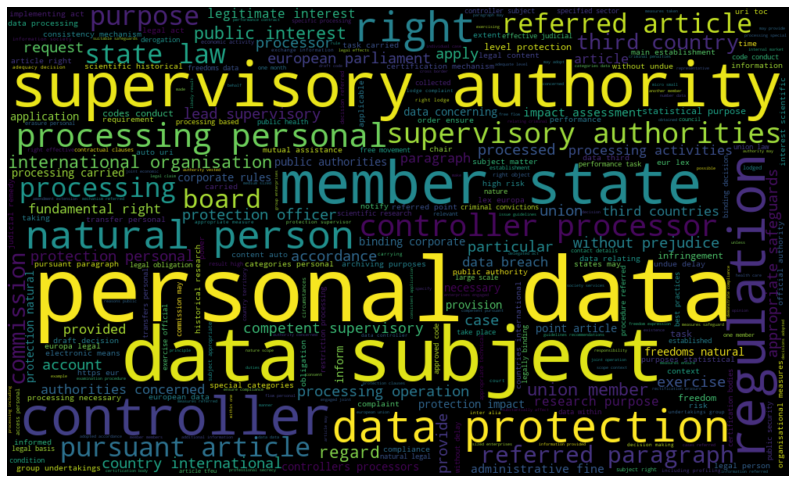

In [45]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

In [46]:
wordcloud.to_file("output/GDPR wordcloud.png")

Šta vidite na grafikonu? Najčešće korišćeni termini su lični podaci (_personal data_), zaštita podataka (_data protection_), fizičko lice (_natural person_), zemlja članica (_member state_) itd. Šta mislite o čemu je tekst? U pitanju je GDPR, direktiva Evropske unije koja se tiče zaštite podataka o ličnosti.

Iako se obrada tekstualnih podataka ne bavi smislom teksta, pažljiva analiza sadržaja na nivou statistike tokena lako može da obradi veliki tekst i prikaže najvažnije elemente. Naravno, u analizi može da se ide dalje. Prvi korak dalje se naziva procesiranje prirodnog jezika ili NLP (eng. _Natural Language Processing_). O tome će, verovatno, biti više reči u nekom narednom, naprednom kursu.